In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense 

mnist = tf.keras.datasets.mnist
(image_train, label_train), (image_test, label_test) = mnist.load_data()

2024-03-21 11:55:38.061392: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-21 11:55:38.065606: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-21 11:55:38.123327: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-21 11:55:39.099312: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Train Image shape :  (60000, 28, 28)
Train Labe :  [5 0 4 ... 5 6 8] 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   

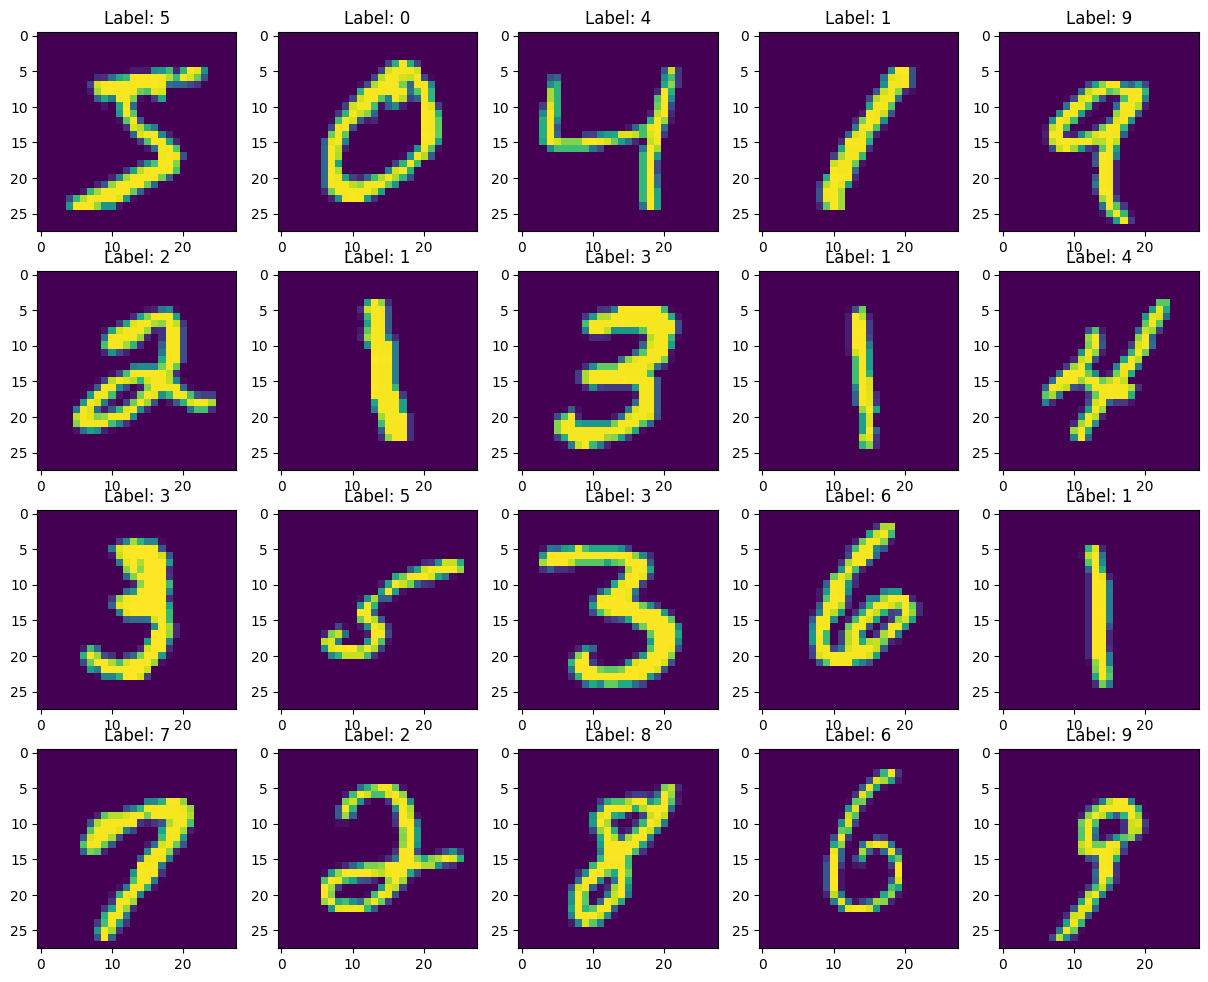

In [2]:
#Perception
print("Train Image shape : ",image_train.shape)
print("Train Labe : ",label_train,"\n")
print(image_train[0])

NUM=20
plt.figure(figsize=(15,15))
for idx in range(NUM):
 sp = plt.subplot(5,5,idx+1)
 plt.imshow(image_train[idx])
 plt.title(f'Label: {label_train[idx]}')
plt.show()

In [4]:
#ANN
model = Sequential([
    Flatten(),
    Dense(128, activation='sigmoid'),
    Dense(64, activation='sigmoid'),
    Dense(10, activation='softmax'),
], name="Simple-ANN")

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

model.fit(image_train, label_train,
          epochs=10, batch_size=10)

model.summary()

model.save('mnist_ANN.keras')

Epoch 1/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.7750 - loss: 0.8297
Epoch 2/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8791 - loss: 0.3922
Epoch 3/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.8925 - loss: 0.3455
Epoch 4/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9043 - loss: 0.3049
Epoch 5/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9131 - loss: 0.2753
Epoch 6/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.9234 - loss: 0.2453
Epoch 7/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9255 - loss: 0.2415
Epoch 8/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9282 - loss: 0.2307
Epoch 9/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9297 - loss: 0.2250
Epoch 10/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9299 - loss: 0.2218


Model: "Simple-ANN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (10, 784)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (10, 128)              │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (10, 64)               │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (10, 10)               │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 328,160 (1.25 MB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 218,774 (854.59 KB)